# **Machine Learning Techniques for Ransomware Detection and Mitigation in Corporate Networks**

# **Random Forest Classifier & Gradient Boosting Model**

## **Importing Libraries**
To do any type of basic analysis or visualization we will be needing some modules or librabies for outcomes. We will be importing libraries like Pandas,numpy(for data manipulation),matplotlib and seaborn(for data visualization).

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import io
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import RocCurveDisplay, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')

# For data visualization
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud


##**Loading the Data**
In this section, we will be importing our data from the google drive and perform some usual data analysis on it later on.

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('data_file.csv')

# **Attributes and their Description:-**
*The dataset contains file attributes such as the file name, MD5 hash, machine type, debug size, relative virtual address, major image version, major OS version, export directory, import address table, linker version, number of sections, stack reserve size, DLL characteristics, resource size, number of Bitcoin addresses, and an indicator if the file is benign.*

**FileName:** The name of the file.

**md5Hash:**The MD5 hash of the file.

**Machine:** The type of machine (architecture) the file is intended for.

**DebugSize:** The size of the debug data.

**DebugRVA:**The relative virtual address of the debug data.

**MajorImageVersion:** The major version number of the image.

**MajorOSVersion:** The major version number of the required operating system.

**ExportRVA:** The relative virtual address of the export directory.

**ExportSize:** The size of the export directory.

**IatVRA:** The virtual address of the import address table.

**MajorLinkerVersion:** The major version number of the linker.

**MinorLinkerVersion:** The minor version number of the linker.

**NumberOfSections:** The number of sections in the file.

**SizeOfStackReserve:** The size of the stack to reserve.

**DllCharacteristics:** The characteristics of the DLL.

**ResourceSize:** The size of the resources.

**BitcoinAddresses:** The number of Bitcoin addresses found.

**Benign:** Indicator if the file is benign (1 for benign, 0 for malicious)Also, this is our Target Variable.

# **EDA and Preprocessing of the Data**
*Data Cleaning is one of the most integral part of analysis, in order to get something meaningful out of a huge dataset we need to figure out how to extract a generalized, smaller and more skewed sub-dataFrame out of it.*

##**Exploratory Data Analysis**

Exploratory Data Analysis (EDA) helps to explore the dataset, which includes file attributes such as the file name, MD5 hash, machine type, debug size, relative virtual address, major image version, major OS version, export directory, import address table, linker version, number of sections, stack reserve size, DLL characteristics, resource size, number of Bitcoin addresses, and an indicator if the file is benign. Additionally, the dataset includes weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour, and date information.

EDA is essential for building a robust understanding of the data and identifying issues associated with either the information or the data collection process. It’s a systematic approach to uncover the story behind the data.

# **Steps for EDA and Preprocessing:**
**Exploratory Data Analysis (EDA):**

Checking for missing values.

Understanding the distribution of each feature.

Analyzing the correlation between features and the target variable.

**Data Cleaning:**

Handling missing values if any.

Normalizing or scale the data if necessary.

Encoding categorical variables if any.

**Feature Engineering:**

Creating new features if necessary.

Selecting important features based on analysis.

**Data Preprocessing:**

Splitting the data into training and testing sets.

Applying any necessary transformations to the data.

## **Data Inspection**
Here, we will be performing basic and initial analysis on our raw data to check the data inside of each provided column, check the data type of each column and shape of our data.

In [3]:
# Checking the shape of the dataframe
print(df.shape)

(62485, 18)


In [4]:
# Displaying the first few rows of the dataframe
df.head()

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1


In [5]:
# Displaying the first few rows of the dataframe
df.tail()

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
62480,VirusShare_a43ceb5e5fffc793e0205d15a0606cb0,a43ceb5e5fffc793e0205d15a0606cb0,332,0,0,1,4,0,0,4096,6,0,3,1048576,0,23504,0,0
62481,VirusShare_0190dafc8304111a00fccf57340ea6a4,0190dafc8304111a00fccf57340ea6a4,332,0,0,7,10,0,0,0,7,0,7,1048576,0,15704,0,0
62482,VirusShare_0f3ca55979aaf59158d6b01140696e44,0f3ca55979aaf59158d6b01140696e44,332,0,0,0,4,0,0,404908,2,50,11,1048576,0,2364,0,0
62483,VirusShare_fca5ce35f1690db6babca5aa5d559535,fca5ce35f1690db6babca5aa5d559535,332,0,0,0,4,14448,70,4096,8,0,4,1048576,0,130296,0,0
62484,VirusShare_d7955a7e6d1e16800feafd4204cbac2b,d7955a7e6d1e16800feafd4204cbac2b,332,0,0,0,5,0,0,4096,9,0,6,1048576,0,6912,0,0


In [6]:
# Using the column attribute to see what type of information is stored in the data.
df.columns

Index(['FileName', 'md5Hash', 'Machine', 'DebugSize', 'DebugRVA',
       'MajorImageVersion', 'MajorOSVersion', 'ExportRVA', 'ExportSize',
       'IatVRA', 'MajorLinkerVersion', 'MinorLinkerVersion',
       'NumberOfSections', 'SizeOfStackReserve', 'DllCharacteristics',
       'ResourceSize', 'BitcoinAddresses', 'Benign'],
      dtype='object')

In [7]:
# By the info method we can check the Nan values and the datatype of all the columns in our dataframe
df.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62485 entries, 0 to 62484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FileName            62485 non-null  object
 1   md5Hash             62485 non-null  object
 2   Machine             62485 non-null  int64 
 3   DebugSize           62485 non-null  int64 
 4   DebugRVA            62485 non-null  int64 
 5   MajorImageVersion   62485 non-null  int64 
 6   MajorOSVersion      62485 non-null  int64 
 7   ExportRVA           62485 non-null  int64 
 8   ExportSize          62485 non-null  int64 
 9   IatVRA              62485 non-null  int64 
 10  MajorLinkerVersion  62485 non-null  int64 
 11  MinorLinkerVersion  62485 non-null  int64 
 12  NumberOfSections    62485 non-null  int64 
 13  SizeOfStackReserve  62485 non-null  int64 
 14  DllCharacteristics  62485 non-null  int64 
 15  ResourceSize        62485 non-null  int64 
 16  BitcoinAddresses    62

In [8]:
# The describe() function applies basic statistical computations on the dataset like extreme values,count of data points etc.
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
FileName,62485,62485,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
md5Hash,62485,62485,79755c51e413ed3c6be4635fd729a6e1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Machine,62485.0,NaN,NaN,NaN,6756.472657,13345.499919,0.0,332.0,332.0,332.0,43620.0
DebugSize,62485.0,NaN,NaN,NaN,25870.477459,6461396.266999,0.0,0.0,0.0,28.0,1615155235.0
DebugRVA,62485.0,NaN,NaN,NaN,154161.114027,1903142.499245,0.0,0.0,0.0,12832.0,285212672.0
MajorImageVersion,62485.0,NaN,NaN,NaN,58.785997,1114.068244,0.0,0.0,0.0,6.0,63325.0
MajorOSVersion,62485.0,NaN,NaN,NaN,5.417524,2.543697,0.0,4.0,5.0,6.0,260.0
ExportRVA,62485.0,NaN,NaN,NaN,895318.632616,37795267.338042,0.0,0.0,0.0,28752.0,2147483648.0
ExportSize,62485.0,NaN,NaN,NaN,409462.345427,28518203.462559,0.0,0.0,0.0,104.0,2415919104.0
IatVRA,62485.0,NaN,NaN,NaN,146631.139634,1124629.726753,0.0,4096.0,8520.0,65536.0,66154496.0


### **Duplicates:**

In [9]:
#Checking for the duplicated entries in the dataset.
MissV = len(df[df.duplicated()])
print("There are",MissV, "duplicate values.")

There are 0 duplicate values.


### **Missing values:**

In [10]:

#Sum of all the null values present in each column.
for i in df.columns.tolist():
  print("Total missing values in",i,":",df[i].isna().sum())

Total missing values in FileName : 0
Total missing values in md5Hash : 0
Total missing values in Machine : 0
Total missing values in DebugSize : 0
Total missing values in DebugRVA : 0
Total missing values in MajorImageVersion : 0
Total missing values in MajorOSVersion : 0
Total missing values in ExportRVA : 0
Total missing values in ExportSize : 0
Total missing values in IatVRA : 0
Total missing values in MajorLinkerVersion : 0
Total missing values in MinorLinkerVersion : 0
Total missing values in NumberOfSections : 0
Total missing values in SizeOfStackReserve : 0
Total missing values in DllCharacteristics : 0
Total missing values in ResourceSize : 0
Total missing values in BitcoinAddresses : 0
Total missing values in Benign : 0


## **EDA:**

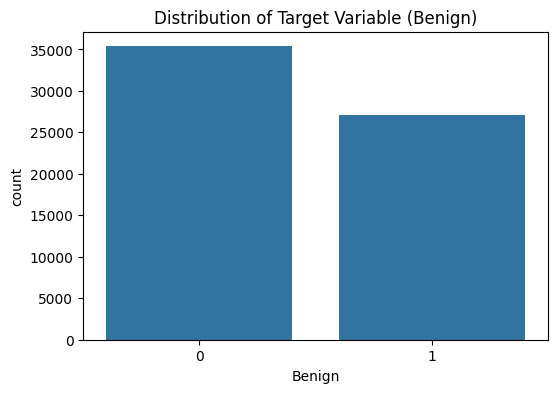

In [11]:
# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Benign', data=df)
plt.title('Distribution of Target Variable (Benign)')
plt.show()



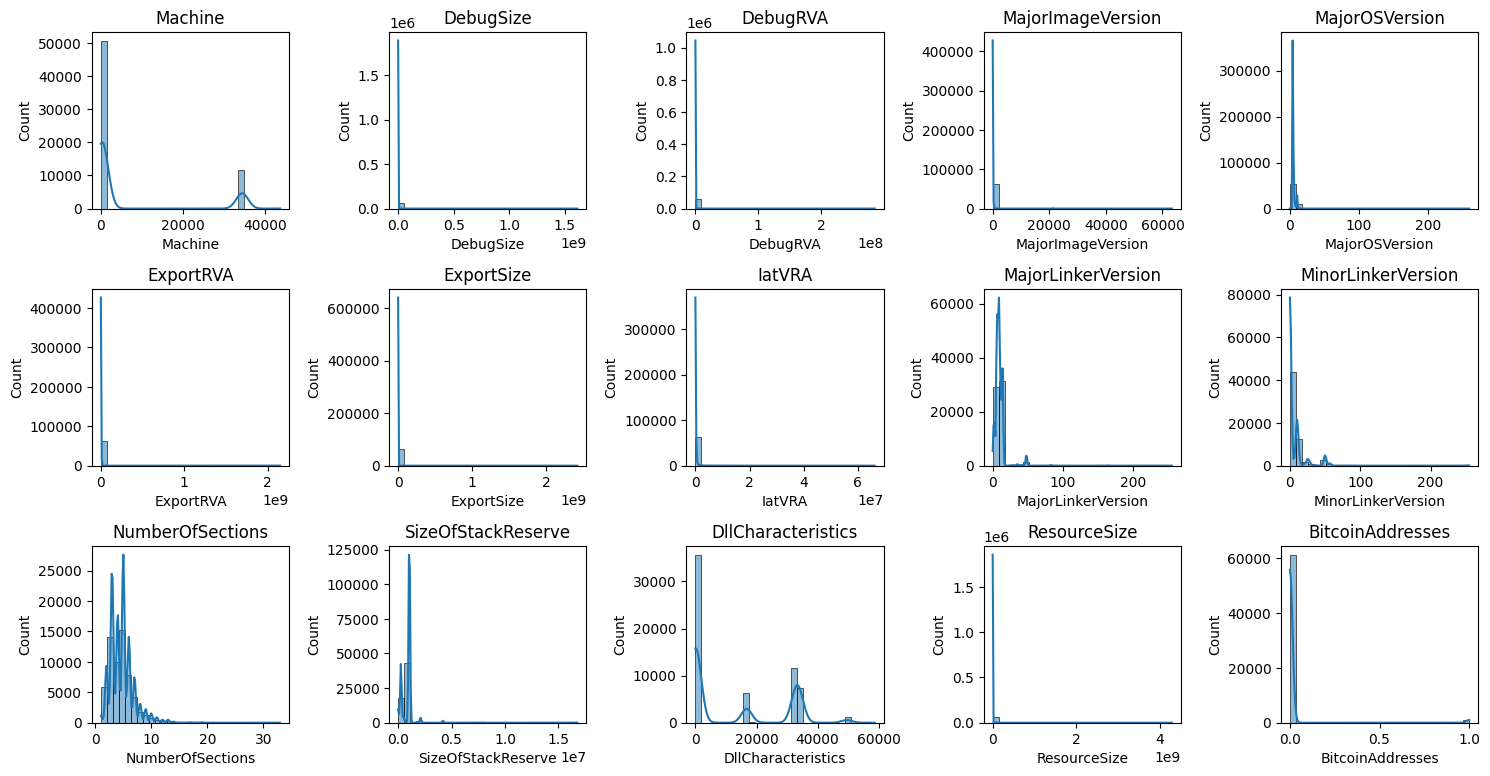

In [12]:
# Plot the distributions of numerical features
num_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_features.remove('Benign')

plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(4, 5, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()


### **Observations from Distribution and Correlation Analysis:**
**Target Variable Distribution:**

* The Benign variable has a roughly equal distribution of benign (1) and
malicious (0) files.

**Feature Distributions:**

* Several features have highly skewed distributions, such as DebugSize, ExportRVA, and ExportSize.
* Some features, like DebugSize, ExportRVA, ExportSize, and IatVRA, have a significant number of zeros, indicating they might not always be relevant or may often be zero.

## **Correlation Matrix:**

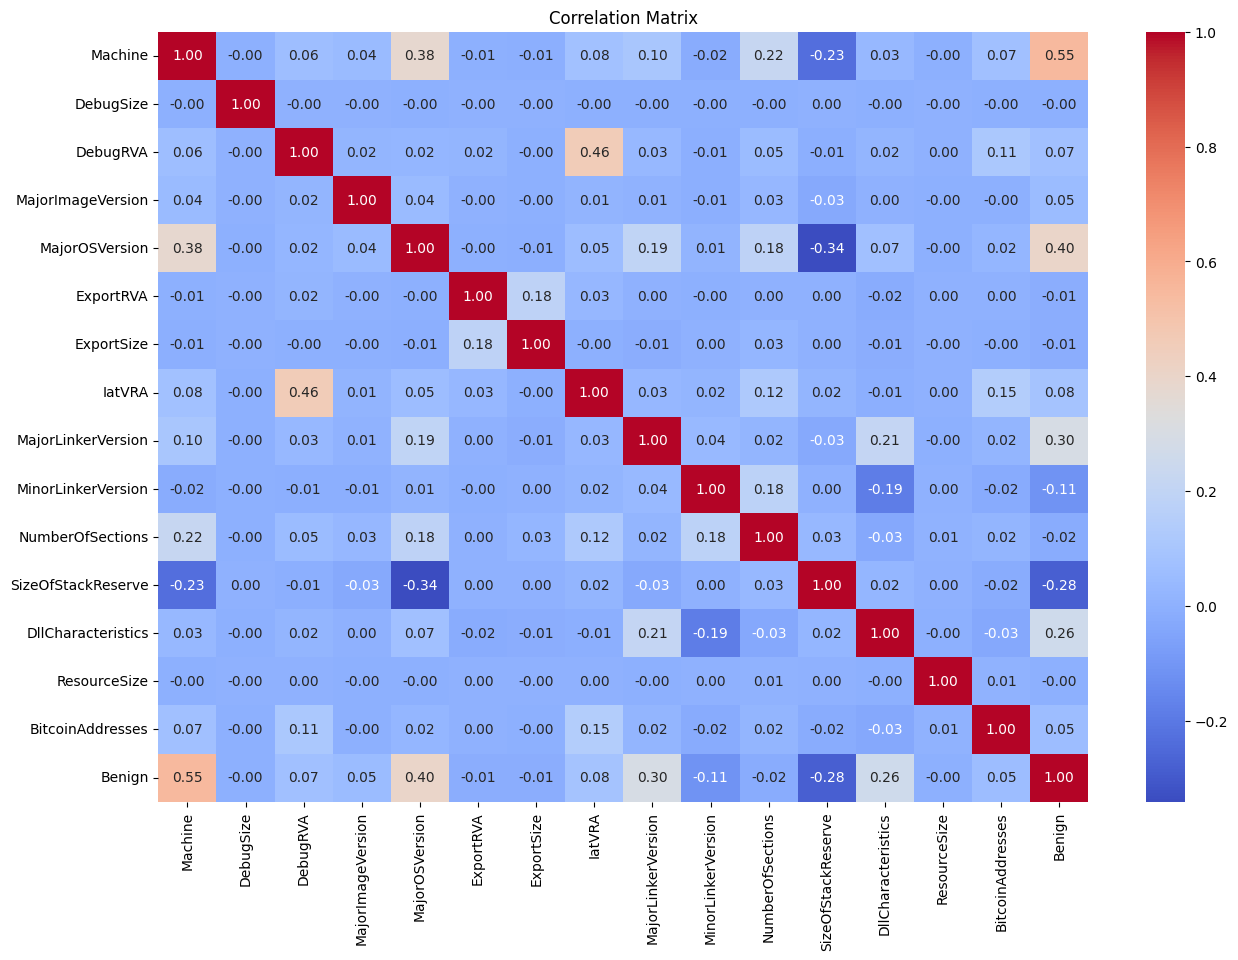

In [13]:
# Selecting only numeric columns for correlation matrix
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Compute the correlation matrix for numeric columns only
correlation_matrix = df[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### **Observations**:
There are some strong correlations between features. For instance, DebugSize and DebugRVA have a noticeable correlation (0.46).
The Benign variable has varying degrees of correlation with different features. Notable correlations include:
* Machine (0.55)
* MajorOSVersion (0.40)
* SizeOfStackReserve (-0.28)

## **Outlier Detection:**

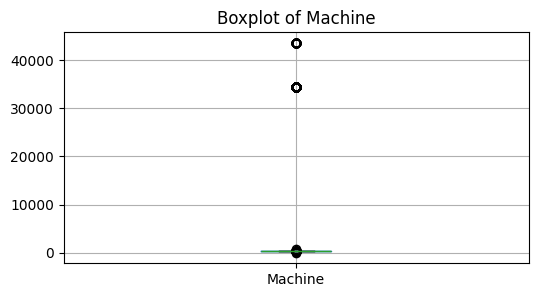

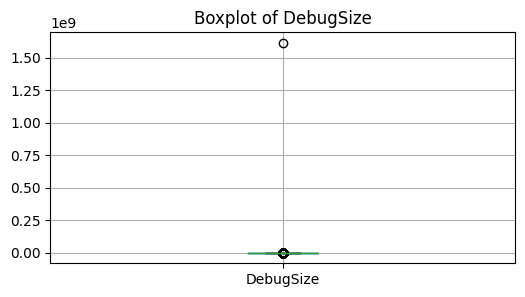

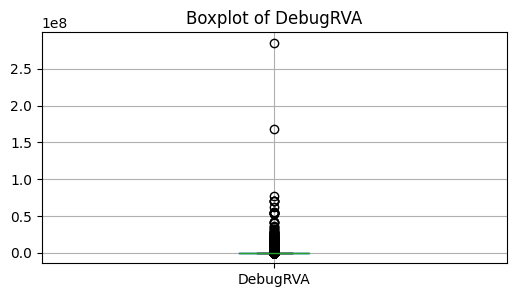

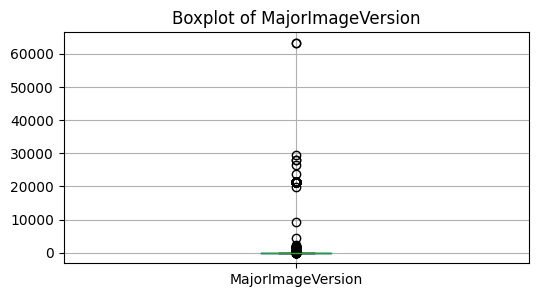

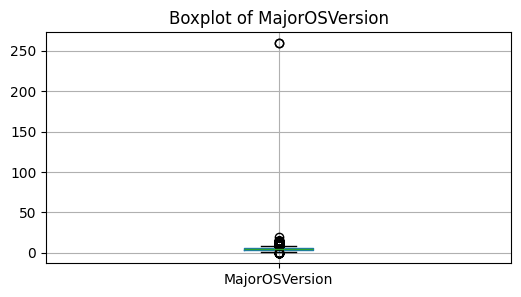

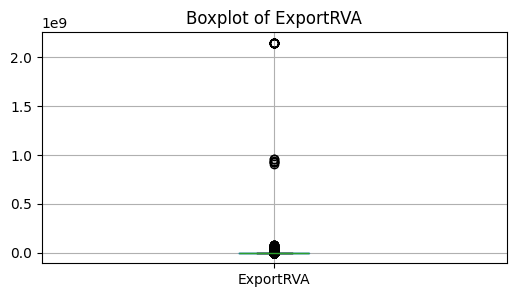

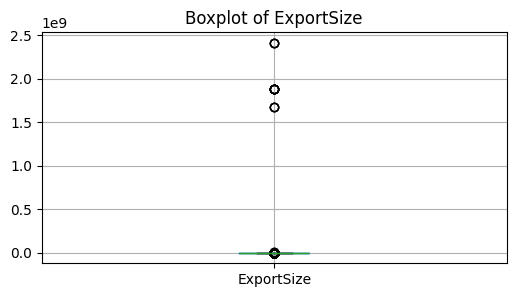

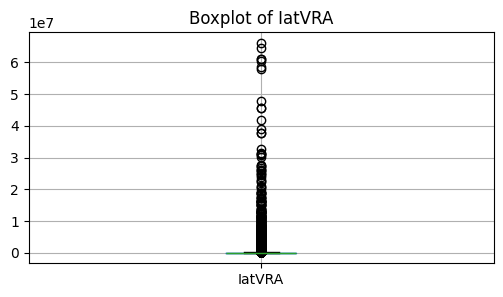

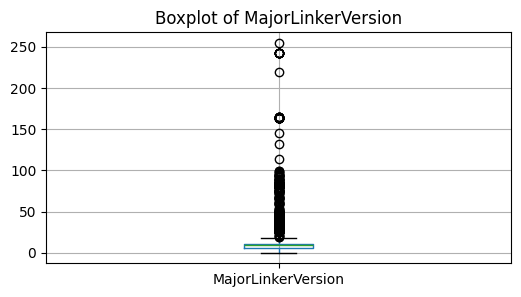

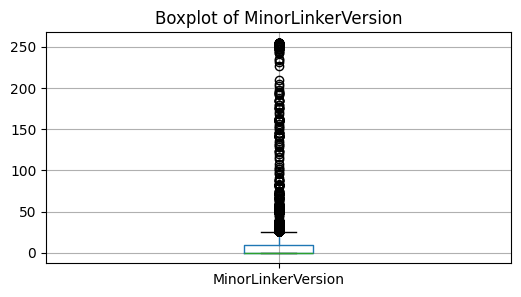

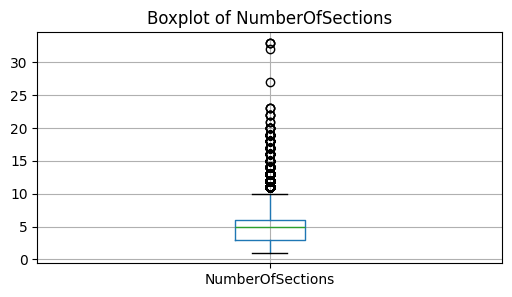

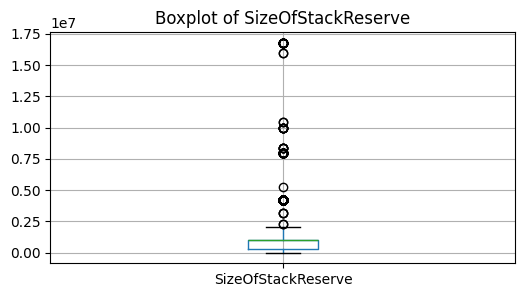

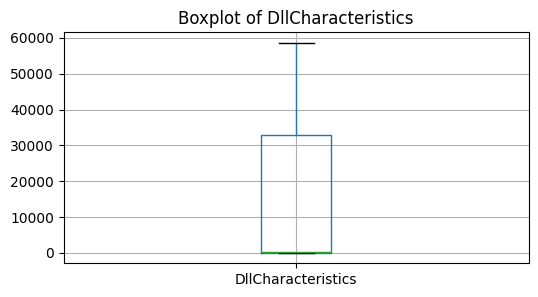

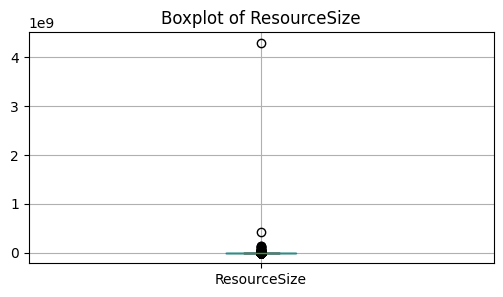

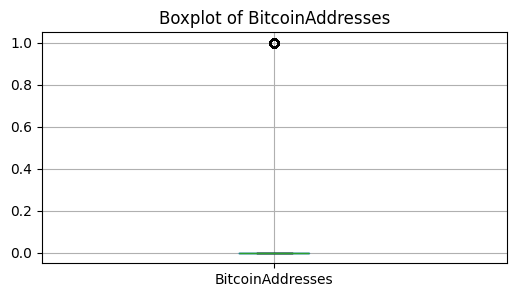

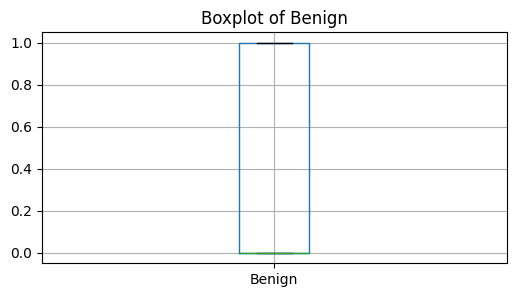

Detected outliers:


,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1
5,0aedb43f9ba5d3014e0600009c316005.wlanapi.dll,28c98e000d02f8bfd9d050eb4e4c5d2e,34404,84,319776,10,10,374944,9208,312608,14,10,7,262144,16736,2072,0,1
7,0c7f9fdc9ba5d301c60900009c316005.wscsvc.dll,39da352fad220e83ce64de8dccb9736b,34404,84,197888,10,10,229024,112,187208,14,10,7,262144,16736,1328,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62026,VirusShare_33a3296ec1753d21fb4b169c2d494d60,33a3296ec1753d21fb4b169c2d494d60,332,0,0,0,4,0,0,4096,7,10,3,1048576,0,106240,1,0
62040,VirusShare_70d8d7b411d59ba690f83b1fa5a5879a,70d8d7b411d59ba690f83b1fa5a5879a,332,28,126976,0,13,118816,4740,127004,40,31,10,1048576,0,556,1,0
62224,VirusShare_adb57ac51c3371f8dfcc9a29e03aa1d4,adb57ac51c3371f8dfcc9a29e03aa1d4,332,28,145632,0,5,352304,2371,354675,10,0,7,1048576,1,16,1,0
62306,VirusShare_bc6ab03276fced867c63cc5274ee1ccc,bc6ab03276fced867c63cc5274ee1ccc,332,0,0,0,5,0,0,8192,9,0,6,1048576,0,27200,1,0


In [14]:
# Function to detect outliers using IQR method
def detect_outliers(df):
    outliers = pd.DataFrame(columns=df.columns)

    for col in df.describe().columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outliers = pd.concat([outliers, df.loc[outlier_indices]])

    return outliers

# Plotting boxplots for each numerical feature
for col in df.describe().columns:
    fig = plt.figure(figsize=(6, 3))
    ax = fig.gca()
    df.boxplot(column=col, ax=ax)
    ax.set_title('Boxplot of ' + col)
    plt.show()

# Detecting outliers in the dataset
outliers = detect_outliers(df)

# Display the detected outliers
print("Detected outliers:")
outliers


## **logarithmic transformation**

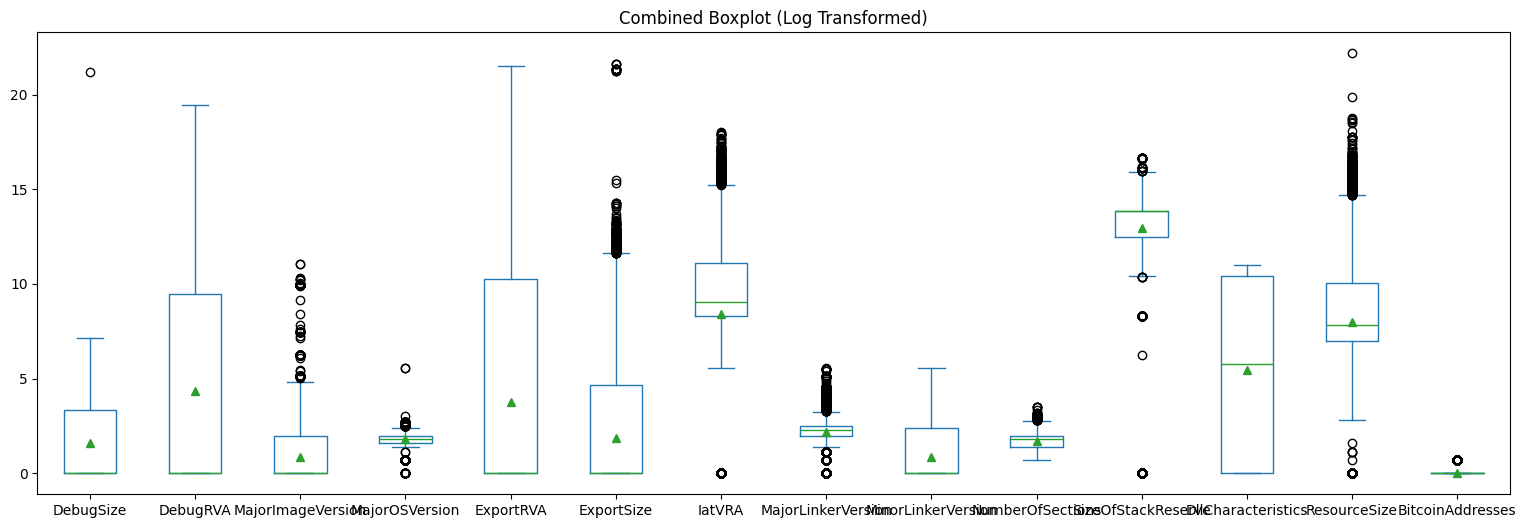

In [15]:
# df contains the numerical features along with target column containig 0 and 1.
numerical_features = [
    'DebugSize', 'DebugRVA', 'MajorImageVersion', 'MajorOSVersion', 'ExportRVA',
    'ExportSize', 'IatVRA', 'MajorLinkerVersion', 'MinorLinkerVersion',
    'NumberOfSections', 'SizeOfStackReserve', 'DllCharacteristics',
    'ResourceSize', 'BitcoinAddresses'
]

# Apply logarithmic transformation to handle wide range of values
log_transformed_df = df.copy()
for feature in numerical_features:
    log_transformed_df[feature] = np.log1p(df[feature])  # log1p is used to handle zeros in the data

# Setting the figure size
plt.rcParams['figure.figsize'] = (19, 6)

# Plotting the combined boxplot for log-transformed numerical features
ax = log_transformed_df[numerical_features].plot(kind='box', title='Combined Boxplot (Log Transformed)', showmeans=True)

# Display the plot
plt.show()


## **Non-Numeric Column Treatment:**

In [16]:
# 'FileName' and 'md5Hash' are the non-numeric columns
non_numeric_columns = ['FileName', 'md5Hash']

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), non_numeric_columns)
    ],
    remainder='passthrough'  # Leave the rest of the columns unchanged
)

## **CHecking for imbalance:**

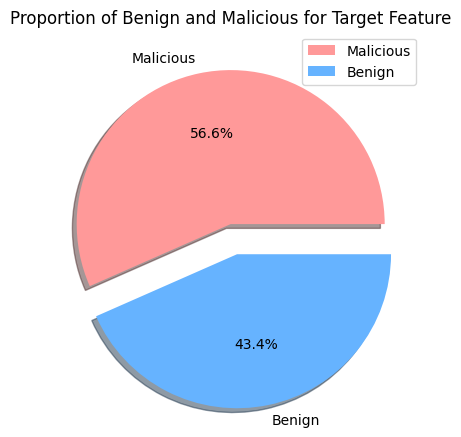

Benign
0    35367
1    27118
Name: count, dtype: int64


In [17]:
# Plotting the pie chart to check the balance in the dataset.
plt.figure(figsize=(7, 5), dpi=100)
proportion = df['Benign'].value_counts()
labels = ['Malicious', 'Benign']  # Adjust labels if needed
plt.title('Proportion of Benign and Malicious for Target Feature')
plt.pie(proportion, explode=(0, 0.2), labels=labels, shadow=True, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.legend()
plt.show()

# Checking the count of the classes in the target variable.
print(df['Benign'].value_counts())


## **Normalization:**

### **Using Standardscaler:**

In [18]:
# Applying normalization operation for numeric stability
standardizer = StandardScaler()

# List of numerical columns to scale
columns_to_scale = [
    'DebugSize', 'DebugRVA', 'MajorImageVersion', 'MajorOSVersion', 'ExportRVA',
    'ExportSize', 'IatVRA', 'MajorLinkerVersion', 'MinorLinkerVersion',
    'NumberOfSections', 'SizeOfStackReserve', 'DllCharacteristics',
    'ResourceSize', 'BitcoinAddresses'
]

# Scaling the numerical columns
df[columns_to_scale] = standardizer.fit_transform(df[columns_to_scale])


## **Dropping unnecessary variable and splitting the target variable:**

In [19]:
# Remove non-numeric columns
df = df.drop(columns=['FileName', 'md5Hash'])
# Splitting the data into set of independent variables and a dependent variable.
X = df.drop('Benign', axis=1).values
y = df['Benign'].values

## **Train and Test Split**

In [20]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

# Checking the shape of our train and test data.
print(X_train.shape)
print(X_test.shape)

(46863, 15)
(15622, 15)


# **Random Forest Classifier:**

In [21]:
# Define and train the RandomForest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# Predict on training and test data
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

In [23]:
# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

Training Accuracy: 0.9997225956511534
Test Accuracy: 0.9962872871591345


### **Confusion Matrix**

In [24]:
# Generate confusion matrix
r_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", r_matrix)

Confusion Matrix:
 [[8820   22]
 [  36 6744]]


In [25]:
# Print classification report for additional metrics
print("Classification Report:\n", classification_report(y_test, y_pred_test))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8842
           1       1.00      0.99      1.00      6780

    accuracy                           1.00     15622
   macro avg       1.00      1.00      1.00     15622
weighted avg       1.00      1.00      1.00     15622



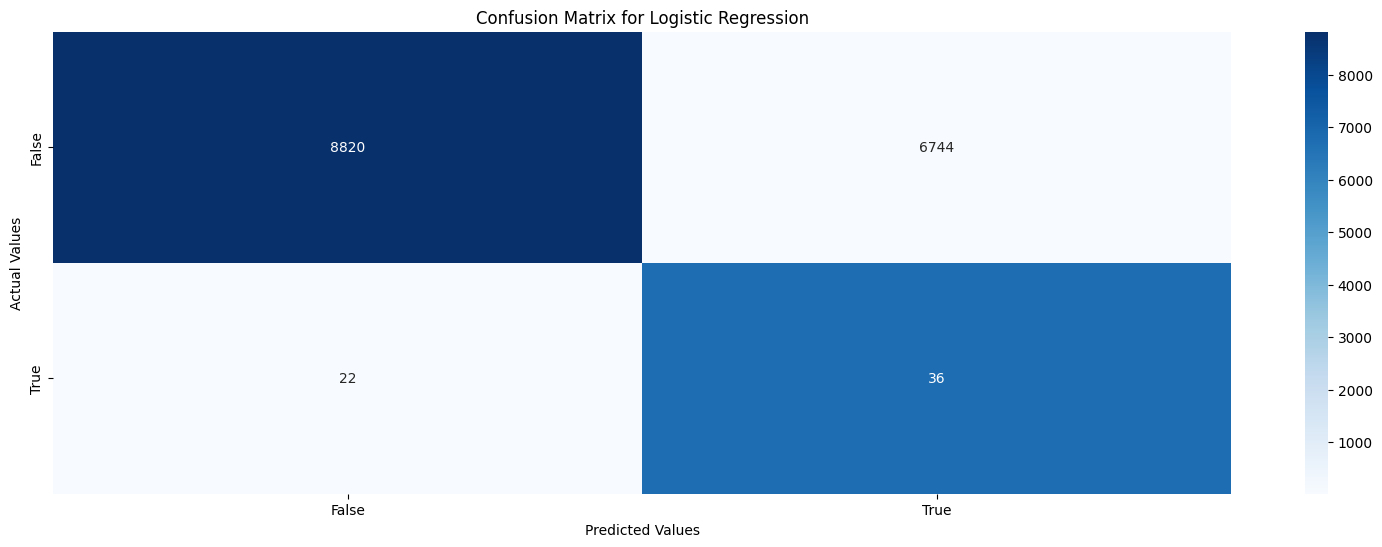

In [26]:

#Plotting the cofusion matrix.
labels = ['8820','6744','22','36']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(r_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for Logistic Regression');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()


# **Gradient Boosting Model:**

In [27]:
# Define and train the GradientBoosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [28]:
# Predict on training and test data
y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)

In [29]:
# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

Training Accuracy: 0.9903762029746281
Test Accuracy: 0.9909102547689156


### **Confusion Matrix:**

In [30]:
# Generate confusion matrix
r_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", r_matrix)

Confusion Matrix:
 [[8792   50]
 [  92 6688]]


In [31]:
# Print classification report for additional metrics
print("Classification Report:\n", classification_report(y_test, y_pred_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8842
           1       0.99      0.99      0.99      6780

    accuracy                           0.99     15622
   macro avg       0.99      0.99      0.99     15622
weighted avg       0.99      0.99      0.99     15622



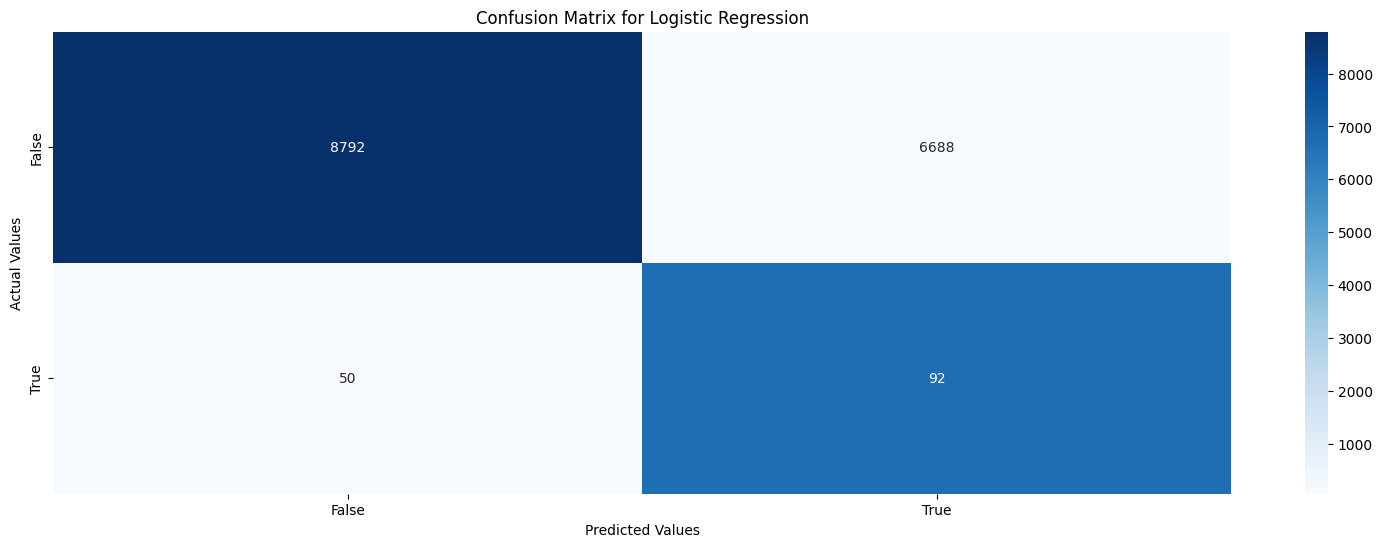

In [32]:

#Plotting the cofusion matrix.
labels = ['8792','6688','50','92']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(r_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for Logistic Regression');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()


In [33]:
# Plotting the table to compare the accuracy scores of all the models.

print('**** Comparison of  Models ****')
table = PrettyTable(['Model', 'Test Accuracy', 'Precision',  'F1_score', 'Recall'])
table.add_row(['Random Forest Classifier', 0.99,	1.00,	1.00,	1.00])
table.add_row(['Gradient Boosting Classifier', 0.99,	0.99,	0.99,	0.99])


print(table)

**** Comparison of  Models ****
+------------------------------+---------------+-----------+----------+--------+
|            Model             | Test Accuracy | Precision | F1_score | Recall |
+------------------------------+---------------+-----------+----------+--------+
|   Random Forest Classifier   |      0.99     |    1.0    |   1.0    |  1.0   |
| Gradient Boosting Classifier |      0.99     |    0.99   |   0.99   |  0.99  |
+------------------------------+---------------+-----------+----------+--------+
